<a href="https://colab.research.google.com/github/mishraShambhavi/Dominat_Color_Extraction/blob/main/DominantColorExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

from sklearn.cluster import KMeans

In [9]:
#read image
img=cv2.imread('/content/Messi1.webp')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(382,306))  #so that number of rows and cols are less
print(img.shape)

(306, 382, 3)


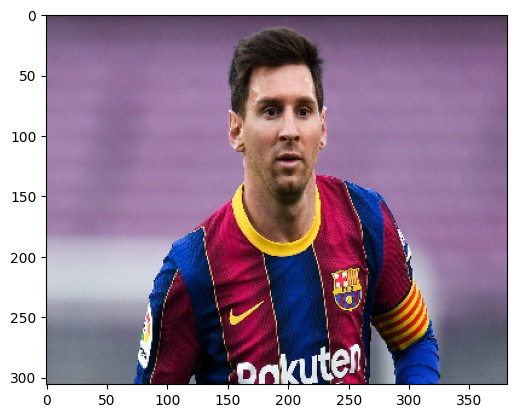

In [11]:
plt.imshow(img)
plt.show()

In [12]:
#each pixel having some rgb value can be mapped as a data pointin a 3d space
#now we define clusters for the above data points
#if we get k dominant clusters and get the mean of that cluster
#now the centroid of this cluster will have some rgb value
#we draw a patch of this rgb value symbolising one of the dominant colors in the image
X=img.reshape((-1,3))  #
print(X.shape) #(116892, 3) pixels and channels


(116892, 3)


In [14]:
k=4
model=KMeans(n_clusters=k)
model.fit(X)  #it will learn the centers


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [18]:
centroids=model.cluster_centers_ #attribute that stores the clusters
print(centroids) #would give float values but r g b should be int values
colors=np.array(centroids,dtype='uint8')
print(colors) #clusters ke centroid ke RGB values int mai

[[119.12111527  62.95146978  83.46616763]
 [214.08956877 199.37830237 184.66763252]
 [ 30.86211043  23.26885341  52.62480762]
 [149.46278905 120.56000462 158.24858468]]
[[119  62  83]
 [214 199 184]
 [ 30  23  52]
 [149 120 158]]


[119  62  83]
[214 199 184]
[30 23 52]
[149 120 158]


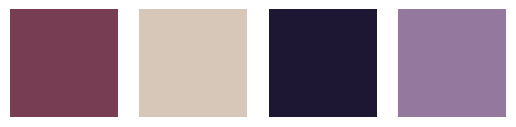

In [29]:
#visualization of colors
#color patch of say(red)  size(100,100,3)
j=1
for i in colors:
  print(i)
  plt.subplot(1,k,j) #k cols
  j=j+1
  plt.axis('off')
  mat=np.zeros((100,100,3),dtype='uint8')  #empty matrix of this size consisting all 0 values
  mat[:,:,:]=i  #filling thr empty matrix
  #mat[:,:,0]=200#allRows:,allCols:, 0th(red)channel value of red=200
#print(mat)
  plt.imshow(mat) #default-black patch

plt.show()

In [30]:
print(colors)

[[119  62  83]
 [214 199 184]
 [ 30  23  52]
 [149 120 158]]


In [31]:
np.unique(model.labels_) #each data point belongs to one of the label this happens in the training part

array([0, 1, 2, 3], dtype=int32)

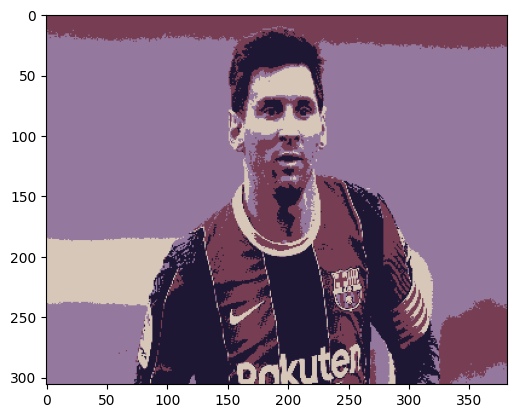

In [35]:
#Painting the image with dominat colrs only
newimg=np.zeros((X.shape),dtype='uint8')
for i in range(newimg.shape[0]): #replaces each pixel with nearest dominat pixel color[i]
  newimg[i]=colors[model.labels_[i]] #newimg ye har ek pixel ko colors ke label ke rgb se change krdo
newimg=newimg.reshape(img.shape)
plt.imshow(newimg)